# Data Cleaning and Exploratory Data Analysis

### The purpose of this notebook is to assess the quality of the data, identify missing data, do the necessary cleaning and explore the variables to understand their relationship with the proposed problem.

# Installing the necessary applications and importing the main libraries

In [2]:
# !pip install --upgrade pip

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.1.1)


In [3]:
# !pip install missingno

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import glob
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

# Load data

In [ ]:
# only have to run once
# !wget http://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download
# !unzip download

In [ ]:
# !wget http://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT/download
# !unzip 'download.1'

In [ ]:
# !wget http://arquivos.prf.gov.br/arquivos/index.php/s/nqvFu7xEF6HhbAq/download
# !unzip 'download.2'

In [ ]:
# !wget http://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe/download
# !unzip 'download.3'    

In [5]:
print(os.listdir('data'))

['datatran2020.csv', 'datatran2018.csv', 'datatran2017.csv', 'datatran2019.csv', '.ipynb_checkpoints']


In [6]:
df_dtran = pd.DataFrame()
path =r'data'
filenames = glob.glob(path + "/*.csv")

for file in filenames:
    df = pd.read_csv(file, sep = ';', decimal=",", encoding = "ISO-8859-1",
                     index_col=False, parse_dates=[["data_inversa", "horario"]])
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns')
    df_dtran = pd.concat([df_dtran,df],axis=0)

nRow, nCol = df_dtran.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19573 rows and 29 columns
There are 69295 rows and 29 columns
There are 89563 rows and 29 columns
There are 67446 rows and 29 columns
There are 245877 rows and 29 columns


In [7]:
df_dtran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245877 entries, 0 to 67445
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   data_inversa_horario    245877 non-null  datetime64[ns]
 1   id                      245877 non-null  float64       
 2   dia_semana              245877 non-null  object        
 3   uf                      245877 non-null  object        
 4   br                      245486 non-null  float64       
 5   km                      245486 non-null  float64       
 6   municipio               245877 non-null  object        
 7   causa_acidente          245877 non-null  object        
 8   tipo_acidente           245877 non-null  object        
 9   classificacao_acidente  245877 non-null  object        
 10  fase_dia                245877 non-null  object        
 11  sentido_via             245877 non-null  object        
 12  condicao_metereologica  245877 

### Feature info

The data were imported successfully, the variables follow the nomenclature provided by the Federal Highway Police https://portal.prf.gov.br/dados-abetos-dicionario-acidentes.
In the "uop" column there is the largest amount of missing data. After analyzing this variable, we can discard it without prejudice to the modeling of the proposed problem.

# Creating the target variable

In [8]:
df_dtran.loc[df_dtran['classificacao_acidente'] == 'Com Vítimas Fatais', 'target'] = 0
df_dtran.loc[df_dtran['classificacao_acidente'] == 'Com Vítimas Feridas', 'target'] = 1
df_dtran.loc[df_dtran['classificacao_acidente'] == 'Sem Vítimas', 'target'] = 2
df_dtran.head()

data_inversa_horario        id    dia_semana  uf     br     km    municipio                causa_acidente              tipo_acidente classificacao_acidente     fase_dia  sentido_via condicao_metereologica tipo_pista tracado_via uso_solo  pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  feridos  veiculos   latitude  longitude regional delegacia       uop  target
0  2020-01-01 01:00:00  260031.0  quarta-feira  TO  153.0  678.1       GURUPI              Animais na Pista    Atropelamento de Animal    Com Vítimas Feridas  Plena Noite    Crescente                Nublado    Simples        Reta      Não        5       0              0               5       0          0        5         1 -11.774602 -49.107450    SR-TO  UOP01/TO       NaN     1.0
1  2020-01-01 01:00:00  260036.0  quarta-feira  RJ  116.0  178.0  NOVA IGUACU  Falta de Atenção do Pedestre  Atropelamento de Pedestre     Com Vítimas Fatais  Plena Noite  Decrescente              Céu Claro      Dupla        Reta      Sim        2       1              0               0       1          0        0         1 -22.752230 -43.437910    SR-RJ    DEL5/1  UOP02/RJ     0.0
2  2020-01-01 01:52:00  260037.0  quarta-feira  SC  101.0  206.9     SAO JOSE            Ingestão de Álcool            Colisão lateral    Com Vítimas Feridas  Plena Noite    Crescente                Nublado    Simples        Reta      Sim        2       0              1               0       1          0        1         2 -27.591935 -48.618246    SR-SC    DEL8/1  UOP01/SC     1.0
3  2020-01-01 01:15:00  260038.0  quarta-feira  RO  364.0  236.0       CACOAL       Velocidade Incompatível  Saída de leito carroçável    Com Vítimas Feridas  Plena Noite  Decrescente                Nublado    Simples        Reta      Sim        1       0              0               1       0          0        1         1 -11.446246 -61.437612    SR-RO   DEL21/2  UOP02/RO     1.0
4  2020-01-01 01:30:00  260039.0  quarta-feira  PR  153.0  360.0     REBOUCAS            Ingestão de Álcool                Capotamento    Com Vítimas Feridas  Plena Noite    Crescente         Garoa/Chuvisco    Simples       Curva      Não        6       0              2               4       0          0        6         1 -25.675038 -50.750898    SR-PR    DEL7/3  UOP04/PR     1.0

This procedure transforms the categorical variable into a numeric one, facilitating analysis and modeling.

In [9]:
# Optimizing memory usage

df_dtran.id = df_dtran.id.astype('int32')
df_dtran.pessoas = df_dtran.pessoas.astype('uint8')
df_dtran.mortos = df_dtran.mortos.astype('uint8')
df_dtran.feridos_leves = df_dtran.feridos_leves.astype('uint8')
df_dtran.feridos_graves = df_dtran.feridos_graves.astype('uint8')
df_dtran.ilesos = df_dtran.ilesos.astype('uint8')
df_dtran.ignorados = df_dtran.ignorados.astype('uint8')
df_dtran.feridos = df_dtran.feridos.astype('uint8')
df_dtran.veiculos = df_dtran.veiculos.astype('uint8')
df_dtran.target = df_dtran.target.astype('uint8')
df_dtran.uf = df_dtran.uf.astype('category')
df_dtran.br = df_dtran.br.astype('category')
df_dtran.municipio = df_dtran.municipio.astype('category')
df_dtran.causa_acidente = df_dtran.causa_acidente.astype('category')
df_dtran.tipo_acidente = df_dtran.tipo_acidente.astype('category')
df_dtran.classificacao_acidente = df_dtran.classificacao_acidente.astype('category')
df_dtran.fase_dia = df_dtran.fase_dia.astype('category')
df_dtran.sentido_via = df_dtran.sentido_via.astype('category')
df_dtran.condicao_metereologica = df_dtran.condicao_metereologica.astype('category')
df_dtran.tipo_pista = df_dtran.tipo_pista.astype('category')
df_dtran.tracado_via = df_dtran.tracado_via.astype('category')
df_dtran.uso_solo = df_dtran.uso_solo.astype('category')
df_dtran['data_hora'] = pd.to_datetime(df_dtran['data_inversa_horario'])
df_dtran['ano'] = df_dtran['data_inversa_horario'].dt.year
df_dtran['mes'] = df_dtran['data_inversa_horario'].dt.month
df_dtran['hora'] = df_dtran['data_inversa_horario'].dt.hour
df_dtran.drop(['data_inversa_horario'], axis=1, inplace = True)

Adjusting the types of variables to reduce memory usage.

# Missing data

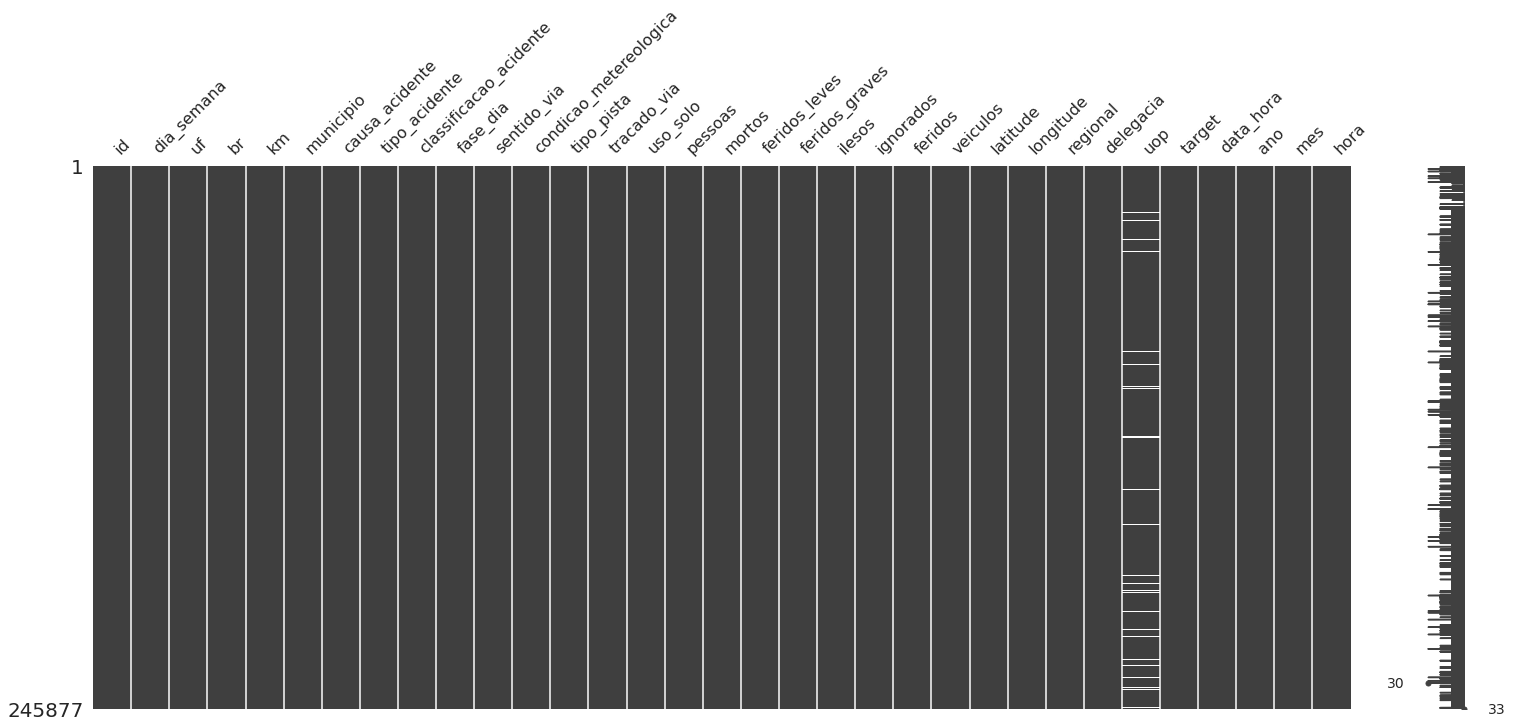

In [10]:
msno.matrix(df_dtran);

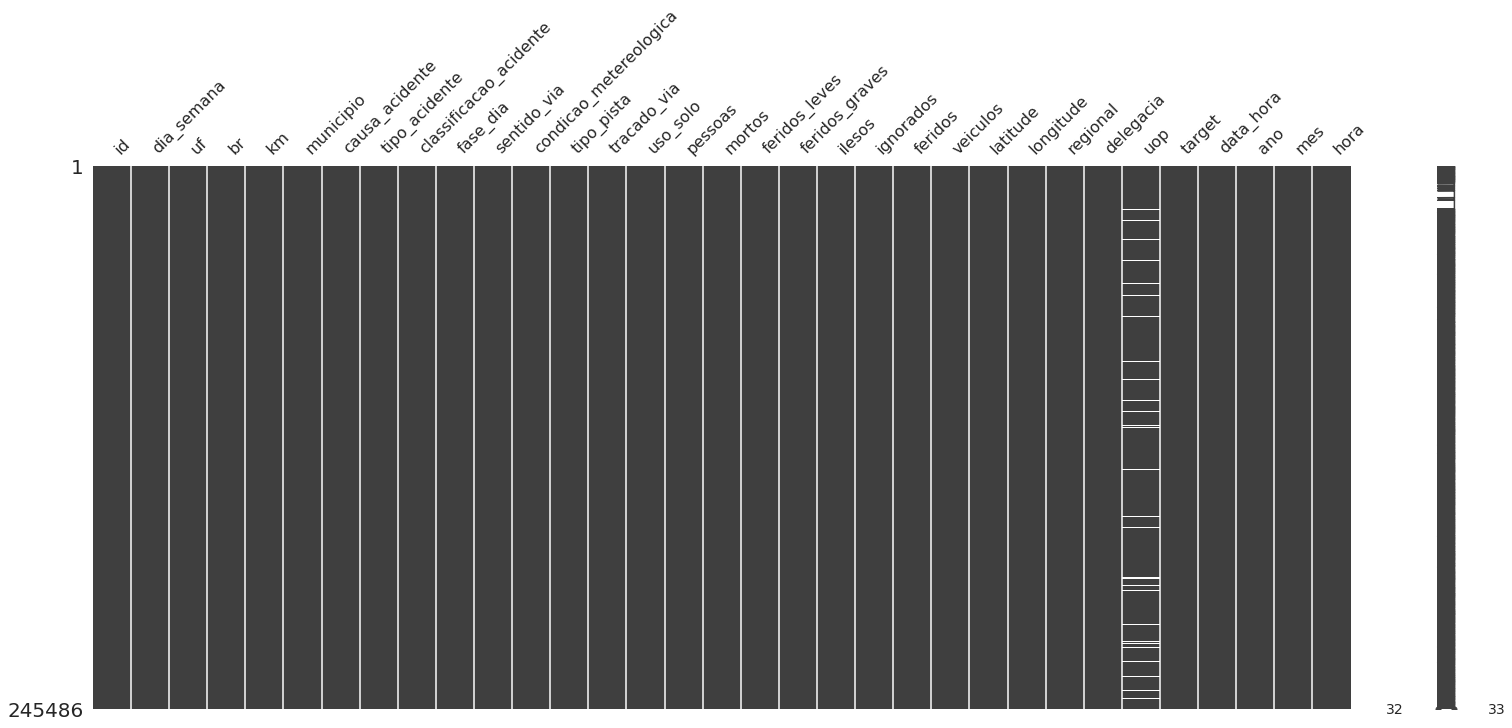

In [11]:
df_dtran.dropna(subset=['uf', 'br'], inplace=True)
msno.matrix(df_dtran);

# Removing variables

In [12]:
df_dtran.drop(['id', 'km', 'municipio', 'regional', 'delegacia', 'uop'], axis=1, inplace=True)

We confirmed our analysis on the "uop" column and identified some cases in "uf" and "br". The first refers to the states where the accidents occurred and the second to the name of the highway. Because it is a small amount of line, we can eliminate them without prejudice to our analysis.

While the "uop" column has more missing cases, eliminating the entire row could result in a significant loss of information, while the column itself is not relevant to the problem, so the option is to remove the entire column.

The variable "id" is an identification of the accident and does not bring relevant information to the problem. The variable "km" indicates the point on the highway where the accident occurred, "municipio" indicates where the accident occurred, both have high cardinality. Other variables that can provide similar information are "br", which contains the name of the highway and "uf", the state where the municipality is located, so the option is to remove these variables.

Finally, the variables "delegacia" and "regional" refer to the government agencies responsible for recording accidents and contribute little to the problem, so they will also be removed.

# Exploratory data analysis

## Analyzing and adjusting categorical variables

In [13]:
sorted(df_dtran.causa_acidente.unique())

['Agressão Externa',
 'Animais na Pista',
 'Avarias e/ou desgaste excessivo no pneu',
 'Carga excessiva e/ou mal acondicionada',
 'Condutor Dormindo',
 'Defeito Mecânico no Veículo',
 'Defeito na Via',
 'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
 'Desobediência às normas de trânsito pelo condutor',
 'Desobediência às normas de trânsito pelo pedestre',
 'Falta de Atenção do Pedestre',
 'Falta de Atenção à Condução',
 'Fenômenos da Natureza',
 'Ingestão de Substâncias Psicoativas',
 'Ingestão de Álcool',
 'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
 'Mal Súbito',
 'Não guardar distância de segurança',
 'Objeto estático sobre o leito carroçável',
 'Pista Escorregadia',
 'Restrição de Visibilidade',
 'Sinalização da via insuficiente ou inadequada',
 'Ultrapassagem Indevida',
 'Velocidade Incompatível']

In [14]:
sorted(df_dtran.tipo_acidente.unique())

['Atropelamento de Animal',
 'Atropelamento de Pedestre',
 'Capotamento',
 'Colisão com objeto em movimento',
 'Colisão com objeto estático',
 'Colisão frontal',
 'Colisão lateral',
 'Colisão transversal',
 'Colisão traseira',
 'Danos eventuais',
 'Derramamento de carga',
 'Engavetamento',
 'Incêndio',
 'Queda de ocupante de veículo',
 'Saída de leito carroçável',
 'Tombamento']

In [15]:
mapa_tipo_acidente = {'Atropelamento de Animal'         : 'Atropelamento de animal',
                      'Atropelamento de Pedestre'       : 'Atropelamento de pedestre',
                      'Capotamento'                     : 'Capotamento',
                      'Colisão com bicicleta'           : 'Outras colisões',
                      'Colisão com objeto em movimento' : 'Outras colisões',
                      'Colisão com objeto estático'     : 'Outras colisões',
                      'Colisão frontal'                 : 'Outras colisões',
                      'Colisão lateral'                 : 'Outras colisões',
                      'Colisão transversal'             : 'Outras colisões',
                      'Colisão traseira'                : 'Colisão traseira',
                      'Danos eventuais'                 : 'Danos eventuais',
                      'Derramamento de carga'           : 'Derramamento de carga',
                      'Engavetamento'                   : 'Engavetamento',
                      'Incêndio'                        : 'Incêndio',
                      'Queda de ocupante de veículo'    : 'Queda de ocupante de veículo',
                      'Saída de leito carroçável'       : 'Saída de pista',
                      'Tombamento'                      : 'Tombamento'}

df_dtran['tipo_acidente_reduz'] = df_dtran.tipo_acidente.map(mapa_tipo_acidente)

In the case of this variable, many descriptions are variations of the same type of accident and, therefore, were grouped.

In [16]:
df_dtran.condicao_metereologica.unique()

[Nublado, Céu Claro, Garoa/Chuvisco, Chuva, Sol, Vento, Ignorado, Nevoeiro/Neblina, Granizo, Neve]
Categories (10, object): [Nublado, Céu Claro, Garoa/Chuvisco, Chuva, ..., Ignorado, Nevoeiro/Neblina, Granizo, Neve]

## Target variable distribution

Text(0, 0.5, 'Number of accidents')

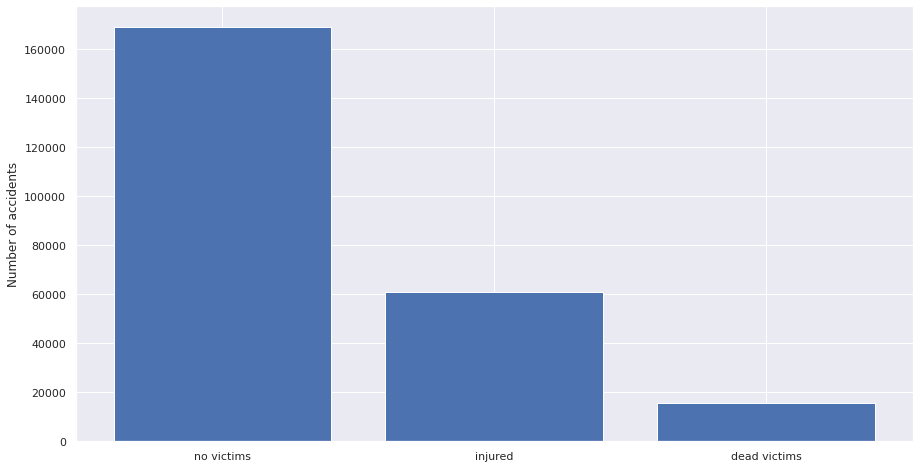

In [17]:
plt.figure(figsize=(15,8))
plt.bar(np.arange(3), df_dtran.target.value_counts())
ticks = plt.xticks(np.arange(3), ['no victims', 'injured', 'dead victims'])
plt.ylabel('Number of accidents')

In [18]:
df_dtran['target'].value_counts(normalize=True)

1    0.688658
2    0.247839
0    0.063503
Name: target, dtype: float64

### The target variable is highly unbalanced. The class "without victims" has approximately 65% ​​of the records, "with victims" almost 24% and "fatal victims" are less than 1%.

In [19]:
df_dtran.describe().T

count          mean           std           min          25%          50%          75%     max
pessoas         245486.0      2.349898  1.905151e+00  1.000000e+00     1.000000     2.000000     3.000000    80.0
mortos          245486.0      0.074876  3.267585e-01  0.000000e+00     0.000000     0.000000     0.000000    21.0
feridos_leves   245486.0      0.825786  1.111526e+00  0.000000e+00     0.000000     1.000000     1.000000    58.0
feridos_graves  245486.0      0.244666  5.962757e-01  0.000000e+00     0.000000     0.000000     0.000000    28.0
ilesos          245486.0      1.075980  1.458656e+00  0.000000e+00     0.000000     1.000000     1.000000    73.0
ignorados       245486.0      0.128590  4.063061e-01  0.000000e+00     0.000000     0.000000     0.000000    16.0
feridos         245486.0      1.070452  1.252052e+00  0.000000e+00     0.000000     1.000000     1.000000    66.0
veiculos        245486.0      1.639491  7.390121e-01  1.000000e+00     1.000000     2.000000     2.000000    16.0
latitude        245486.0  -4404.262110  2.086596e+06 -1.033383e+09   -25.355706   -20.412021   -12.821526   163.0
longitude       245486.0 -16797.163733  8.108198e+06 -4.016764e+09   -50.229102   -47.848440   -42.676917   717.0
target          245486.0      1.184336  5.266525e-01  0.000000e+00     1.000000     1.000000     1.000000     2.0
ano             245486.0   2018.069283  9.757798e-01  2.017000e+03  2017.000000  2018.000000  2019.000000  2020.0
mes             245486.0      6.191567  3.550943e+00  1.000000e+00     3.000000     6.000000     9.000000    12.0
hora            245486.0     12.934949  6.068335e+00  0.000000e+00     8.000000    14.000000    18.000000    23.0

In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
   
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes,
                                                                           # pick columns that have
                                                                           # between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 240, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

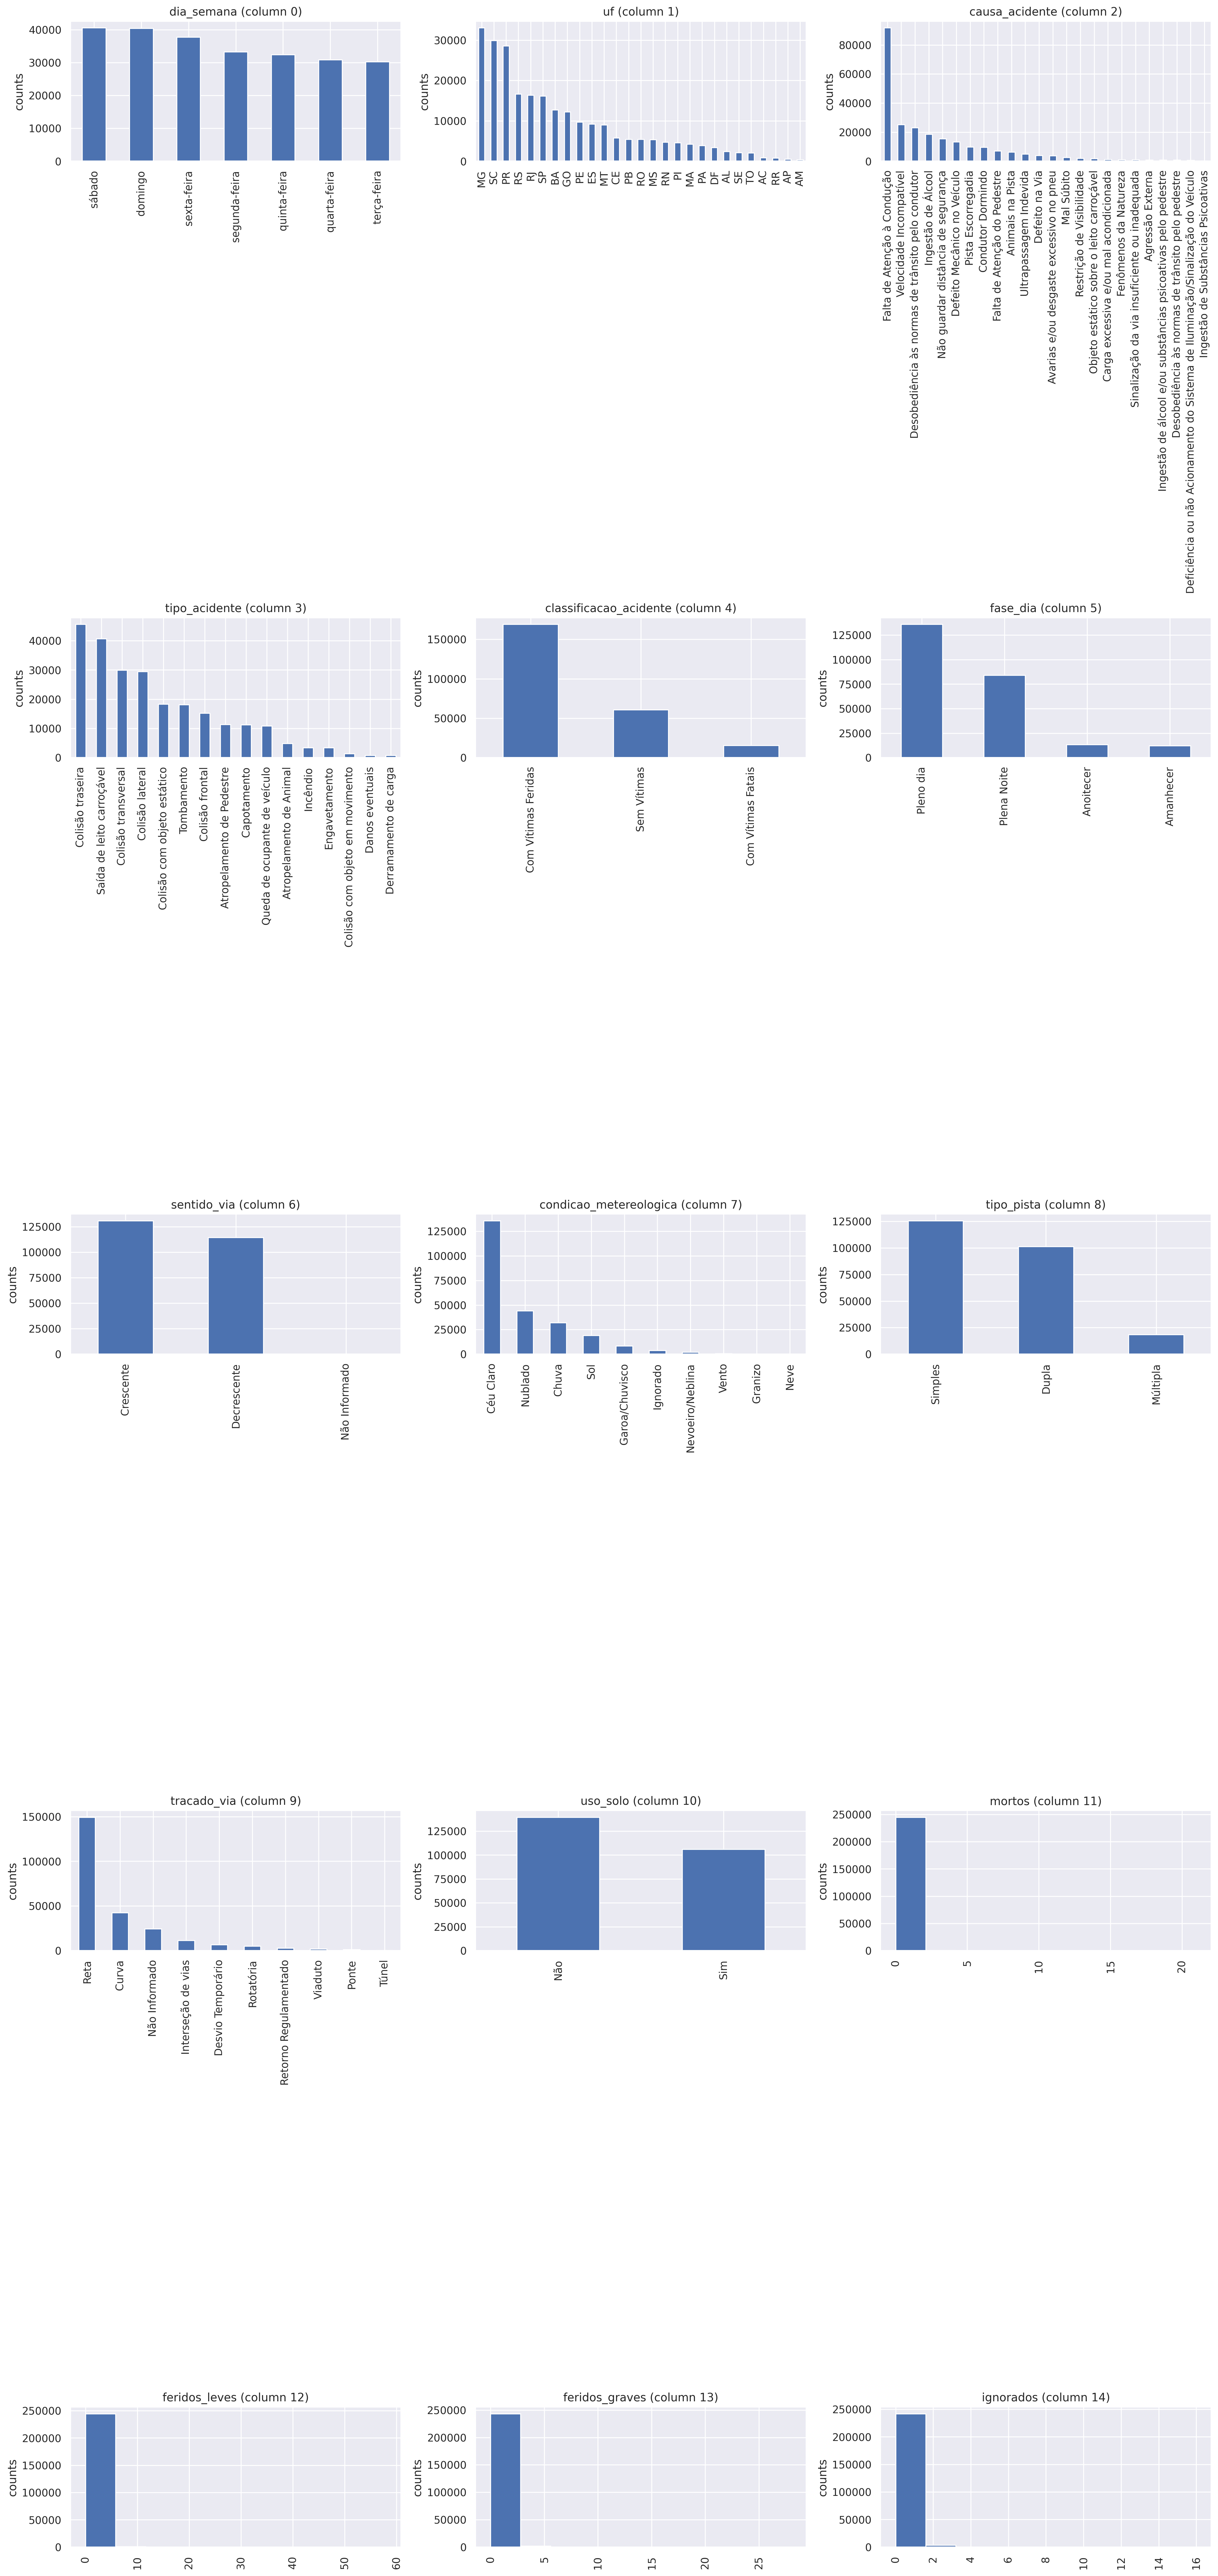

In [27]:
plotPerColumnDistribution(df_dtran, 15, 3)

#### Pairplot Correlation

In [33]:
# determine categorical and numerical features
numerical = df_dtran.select_dtypes(include=['int64', 'float64', ]).columns
categorical = df_dtran.select_dtypes(include=['object']).columns

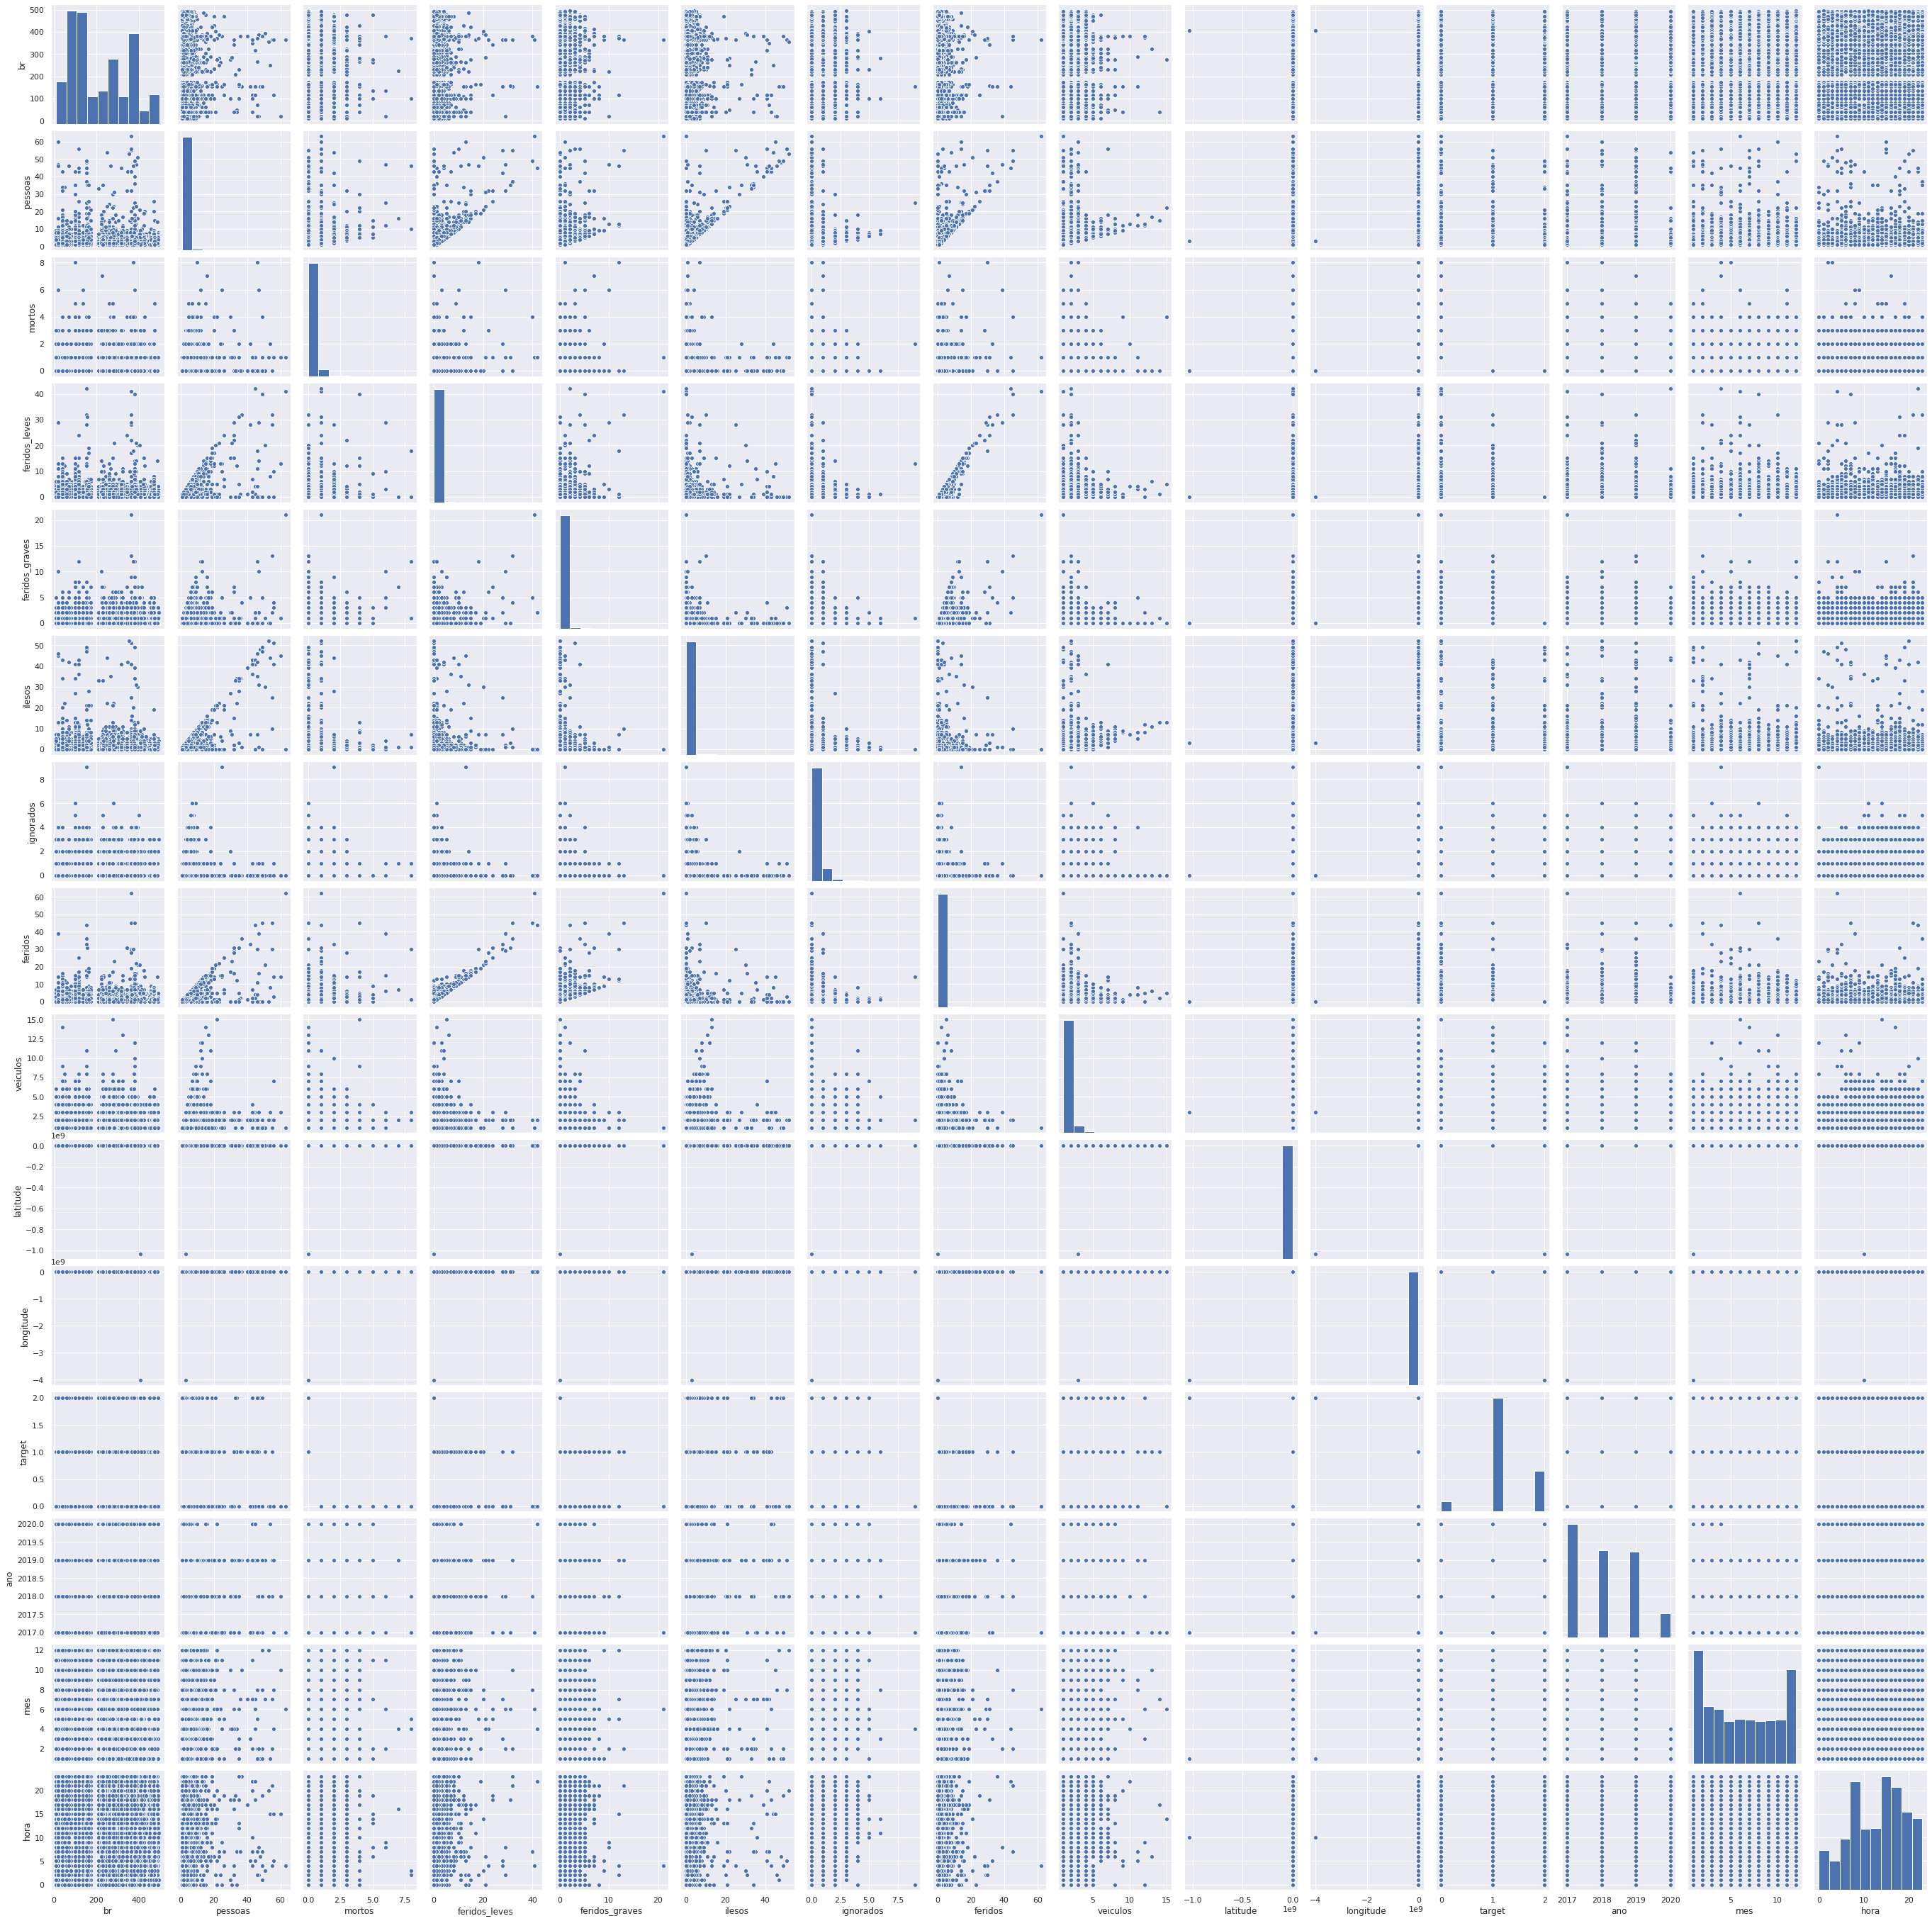

In [34]:
sns.pairplot(df_dtran.drop(df_dtran.select_dtypes(include=['object']).columns ,axis=1).sample(frac=0.2));

#### Person related features correlation

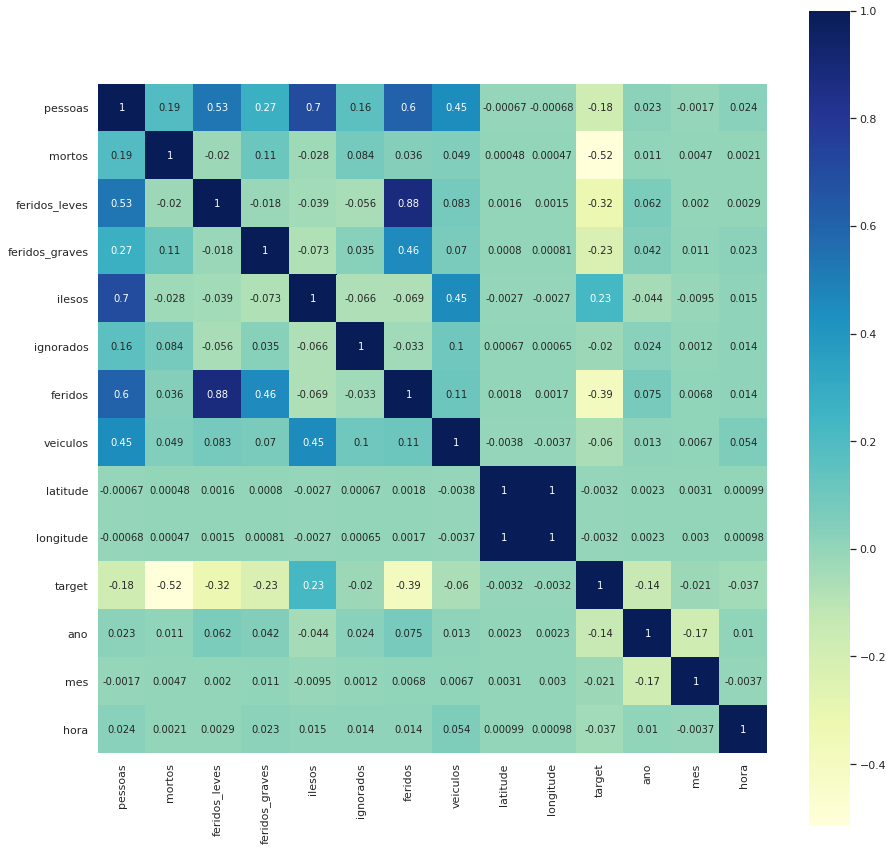

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df_dtran.corr(), cmap='YlGnBu', square=True, annot=True);

#### Number of accidents per day of the week

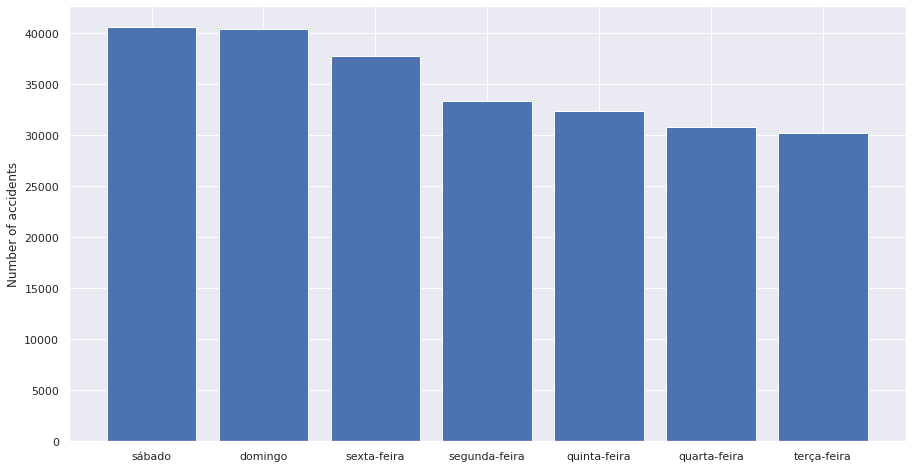

In [38]:
plt.figure(figsize=(15,8))
plt.bar(np.arange(7), df_dtran.dia_semana.value_counts())
ticks = plt.xticks(np.arange(7), df_dtran.dia_semana.value_counts().index)
plt.ylabel('Number of accidents')
plt.show()

#### Number of accidents by type of accident

Text(0.5, 0, 'Number of accidents')

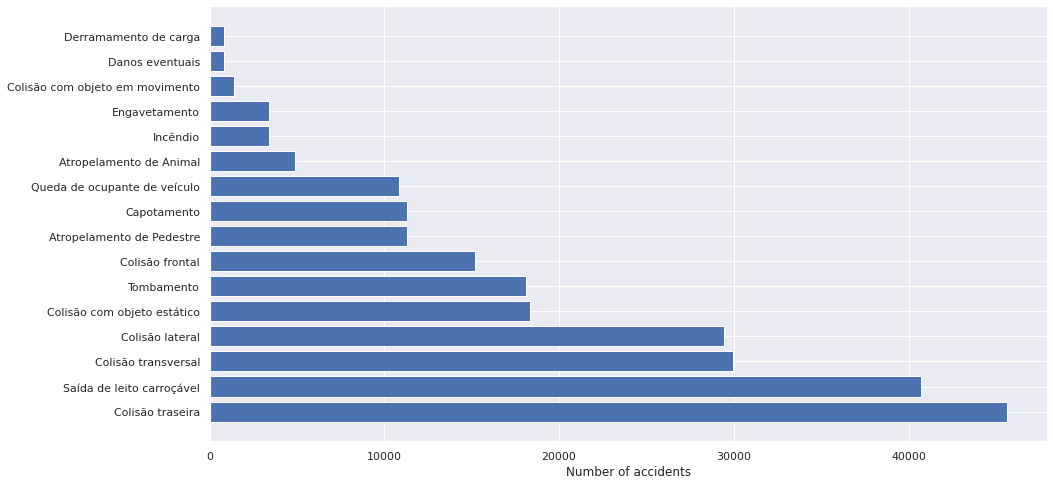

In [39]:
dd = df_dtran.tipo_acidente.value_counts()

plt.figure(figsize=(15,8))
plt.barh(np.arange(len(dd)), dd)
ticks = plt.yticks(np.arange(len(dd)), dd.index)
plt.xlabel('Number of accidents')

#### Distribution between types of accidents and the target variable

In [40]:
grouped = df_dtran.groupby(['tipo_acidente', 'target']).size().unstack()
grouped['tipo_acidente_reduz'] = grouped.index
grouped.head()

target                              0      1     2              tipo_acidente_reduz
tipo_acidente                                                                      
Atropelamento de Animal           261   2960  1659          Atropelamento de Animal
Atropelamento de Pedestre        3085   8082   147        Atropelamento de Pedestre
Capotamento                       450   7304  3527                      Capotamento
Colisão com objeto em movimento    79    988   358  Colisão com objeto em movimento
Colisão com objeto estático       798  10008  7504      Colisão com objeto estático

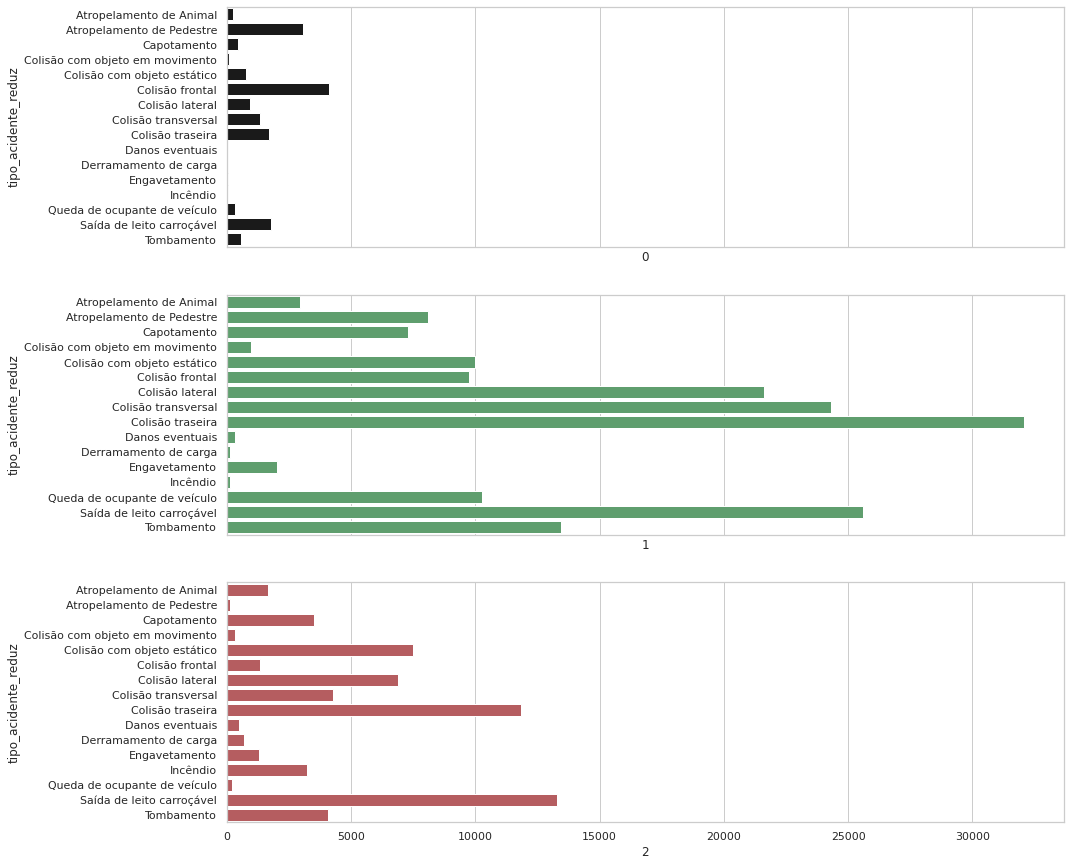

In [41]:
sns.set(style="whitegrid")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

sns.barplot(x=0, y="tipo_acidente_reduz", data=grouped, label="Dead", color="k", ax=ax1)
sns.barplot(x=1, y="tipo_acidente_reduz", data=grouped, label="Injuried", color="g", ax=ax2)
sns.barplot(x=2, y="tipo_acidente_reduz", data=grouped, label="No Victims", color="r", ax=ax3)

Text(0.5, 48.5, '')

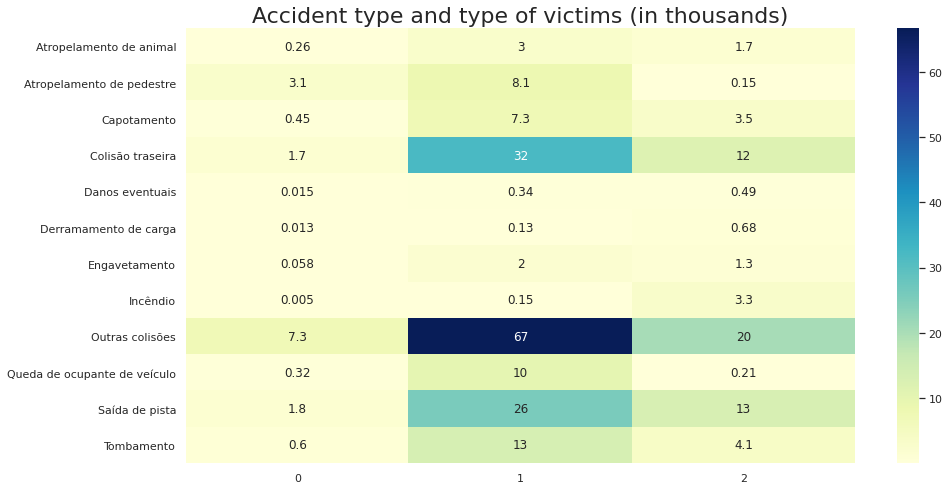

In [45]:
grouped = df_dtran.groupby(['tipo_acidente_reduz', 'target']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='YlGnBu', annot=True)
plt.title('Accident type and type of victims (in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Distribution between the type of accident and the cause

Text(0.5, 66.0, '')

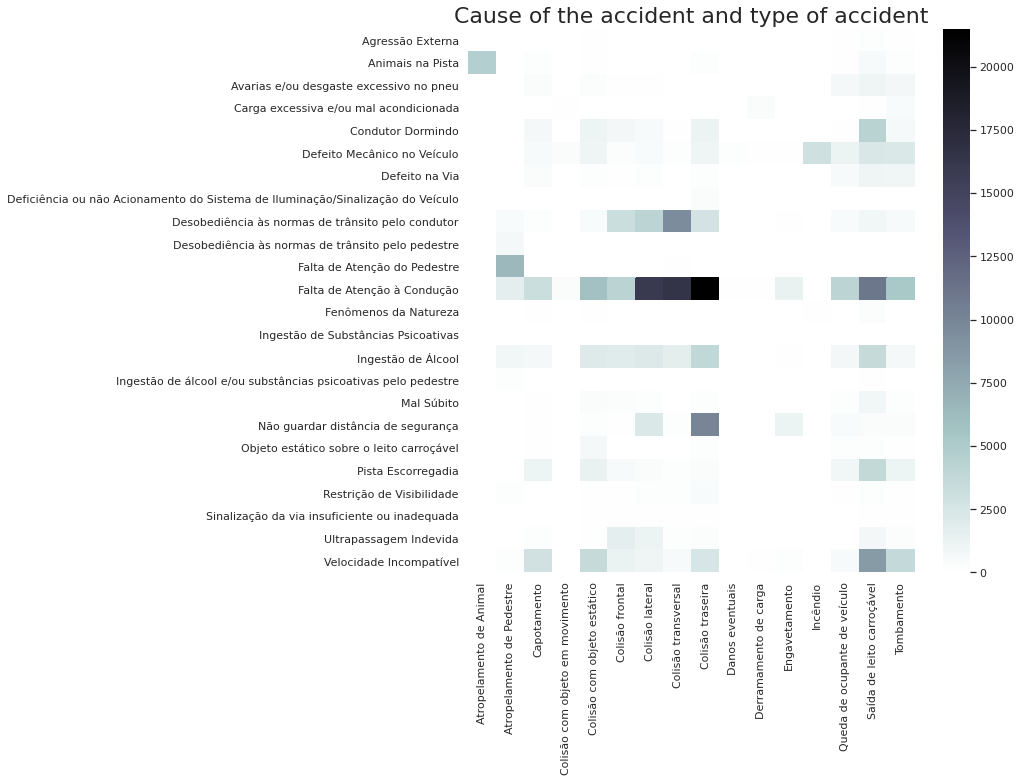

In [49]:
df_dtran['causa_acidente'] = df_dtran.causa_acidente.apply(lambda x: x.strip())
df_dtran['tipo_acidente'] = df_dtran.tipo_acidente.apply(lambda x: x.strip())

gp = df_dtran.groupby(['causa_acidente', 'tipo_acidente']).size().unstack()
gp.fillna(0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(gp, cmap='bone_r')
plt.title('Cause of the accident and type of accident', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Weather and number of victims (in thousands)

Text(0.5, 48.5, '')

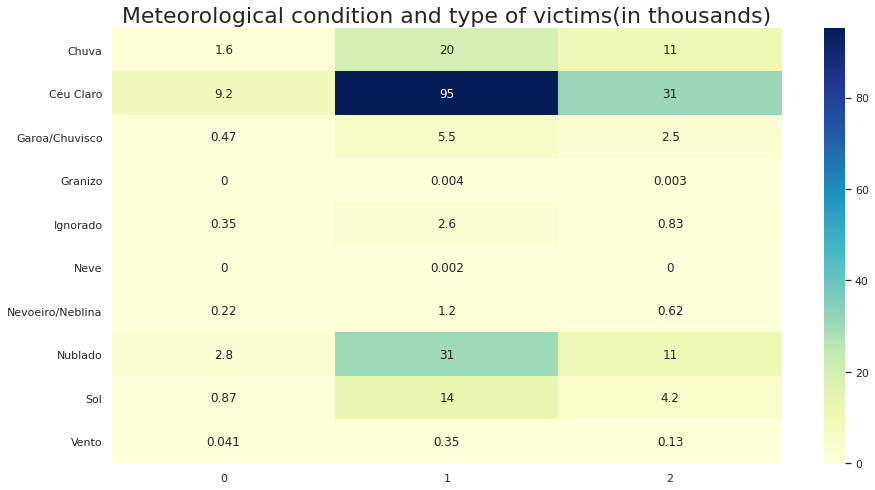

In [51]:
grouped = df_dtran.groupby(['condicao_metereologica', 'target']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='YlGnBu', annot=True)
plt.title('Meteorological condition and type of victims(in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Number of accidents per day stage

Text(0, 0.5, 'Number of accidents')

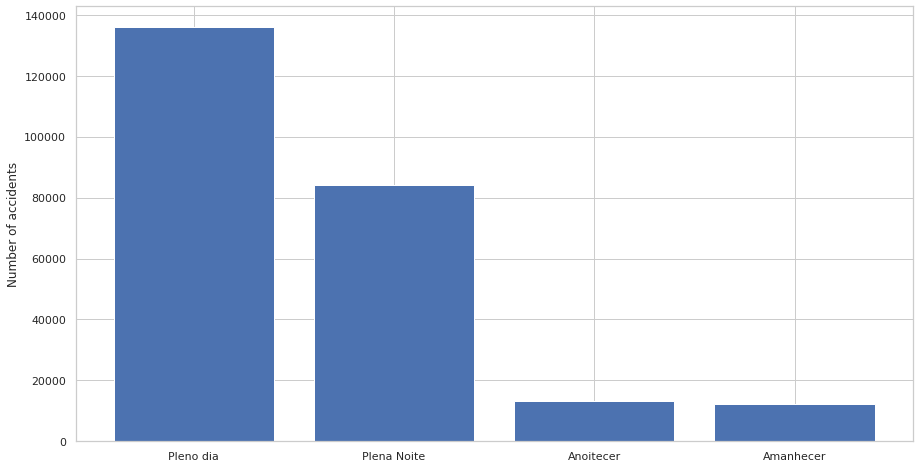

In [52]:
plt.figure(figsize=(15,8))
plt.bar(np.arange(4), df_dtran.fase_dia.value_counts())
ticks = plt.xticks(np.arange(4), df_dtran.fase_dia.value_counts().index)
plt.ylabel('Number of accidents')

Text(0.5, 48.5, '')

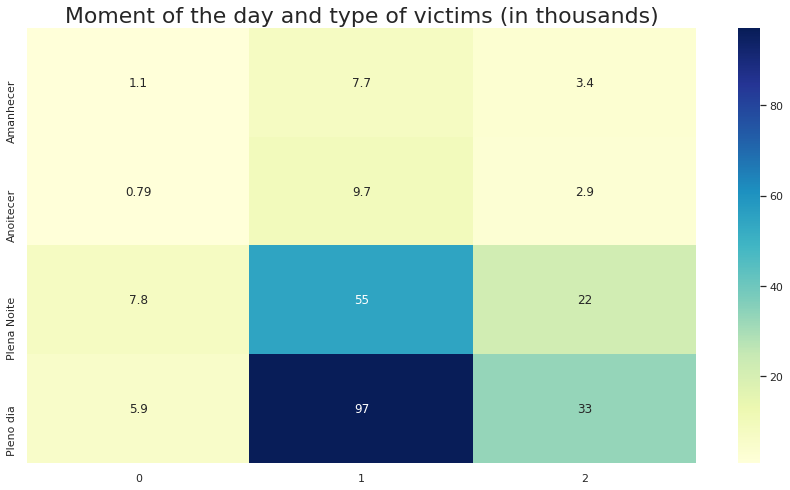

In [53]:
grouped = df_dtran.groupby(['fase_dia', 'target']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='YlGnBu', annot=True)
plt.title('Moment of the day and type of victims (in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Distribution of the target variable by the direction of the road

Text(0.5, 48.5, '')

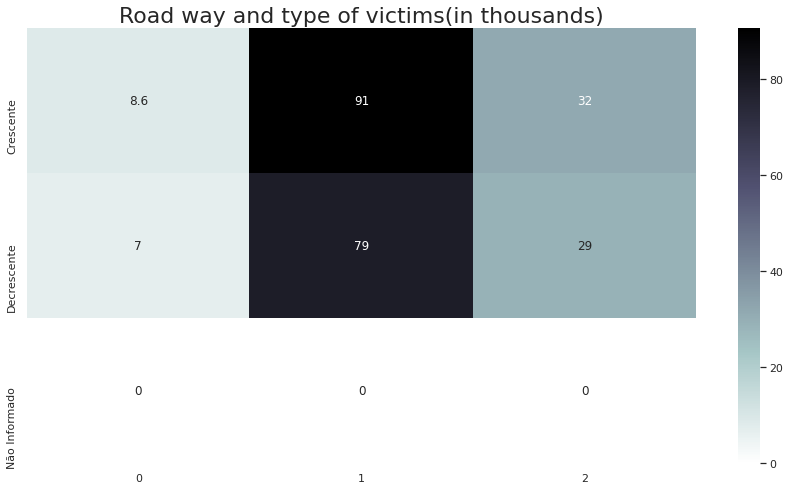

In [55]:
grouped = df_dtran.groupby(['sentido_via', 'target']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='bone_r', annot=True)
plt.title('Road way and type of victims(in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Distribution of the target variable by the track layout

Text(0.5, 48.5, '')

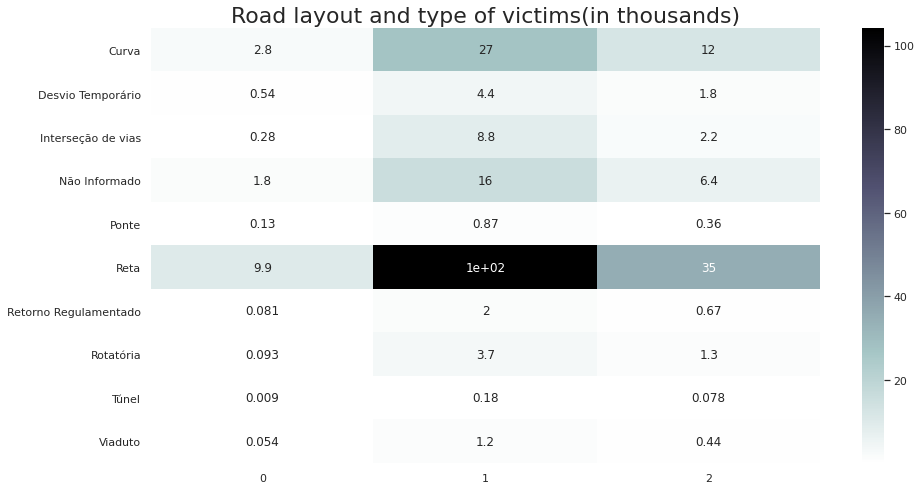

In [56]:
grouped = df_dtran.groupby(['tracado_via', 'target']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='bone_r', annot=True)
plt.title('Road layout and type of victims(in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Distribution of target variable by track type

Text(0.5, 48.5, '')

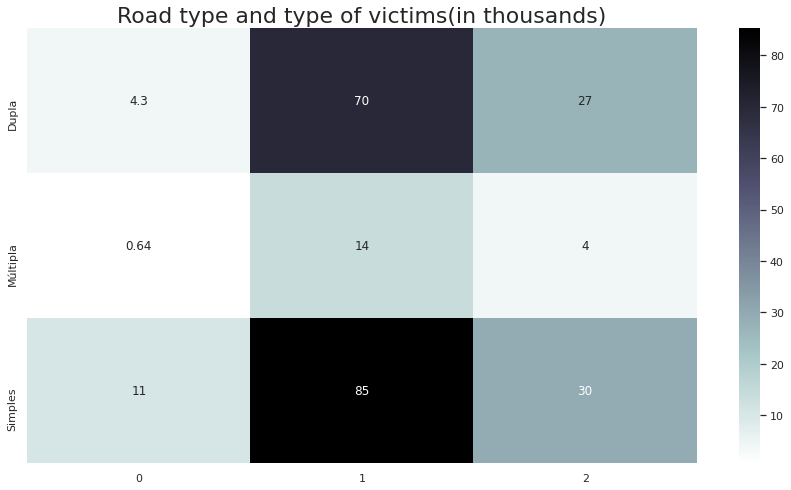

In [57]:
grouped = df_dtran.groupby(['tipo_pista', 'target']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='bone_r', annot=True)
plt.title('Road type and type of victims(in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Distribution of the target variable by state

Text(0.5, 48.5, '')

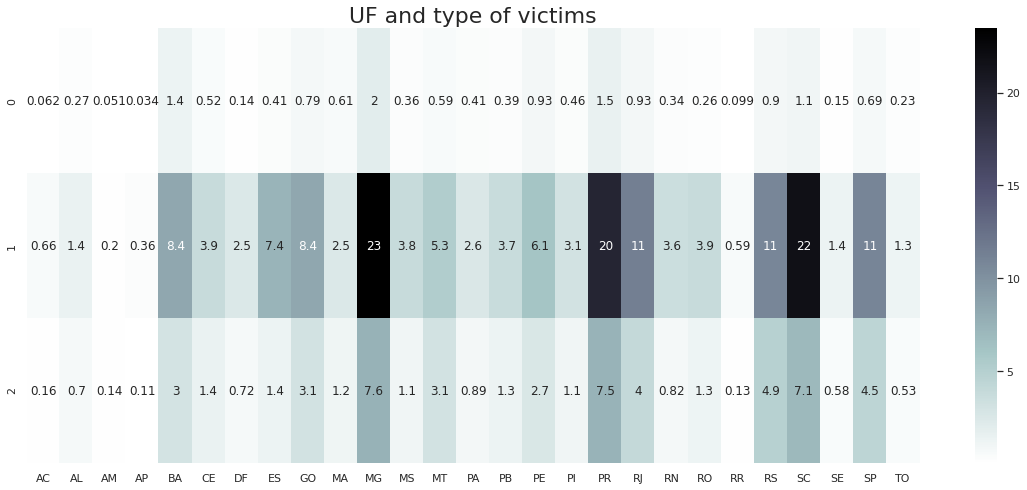

In [60]:
grouped = df_dtran.groupby(['target', 'uf']).size().unstack()

plt.figure(figsize=(20,8))
sns.heatmap(grouped/1000, cmap='bone_r', annot=True)
plt.title('UF and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

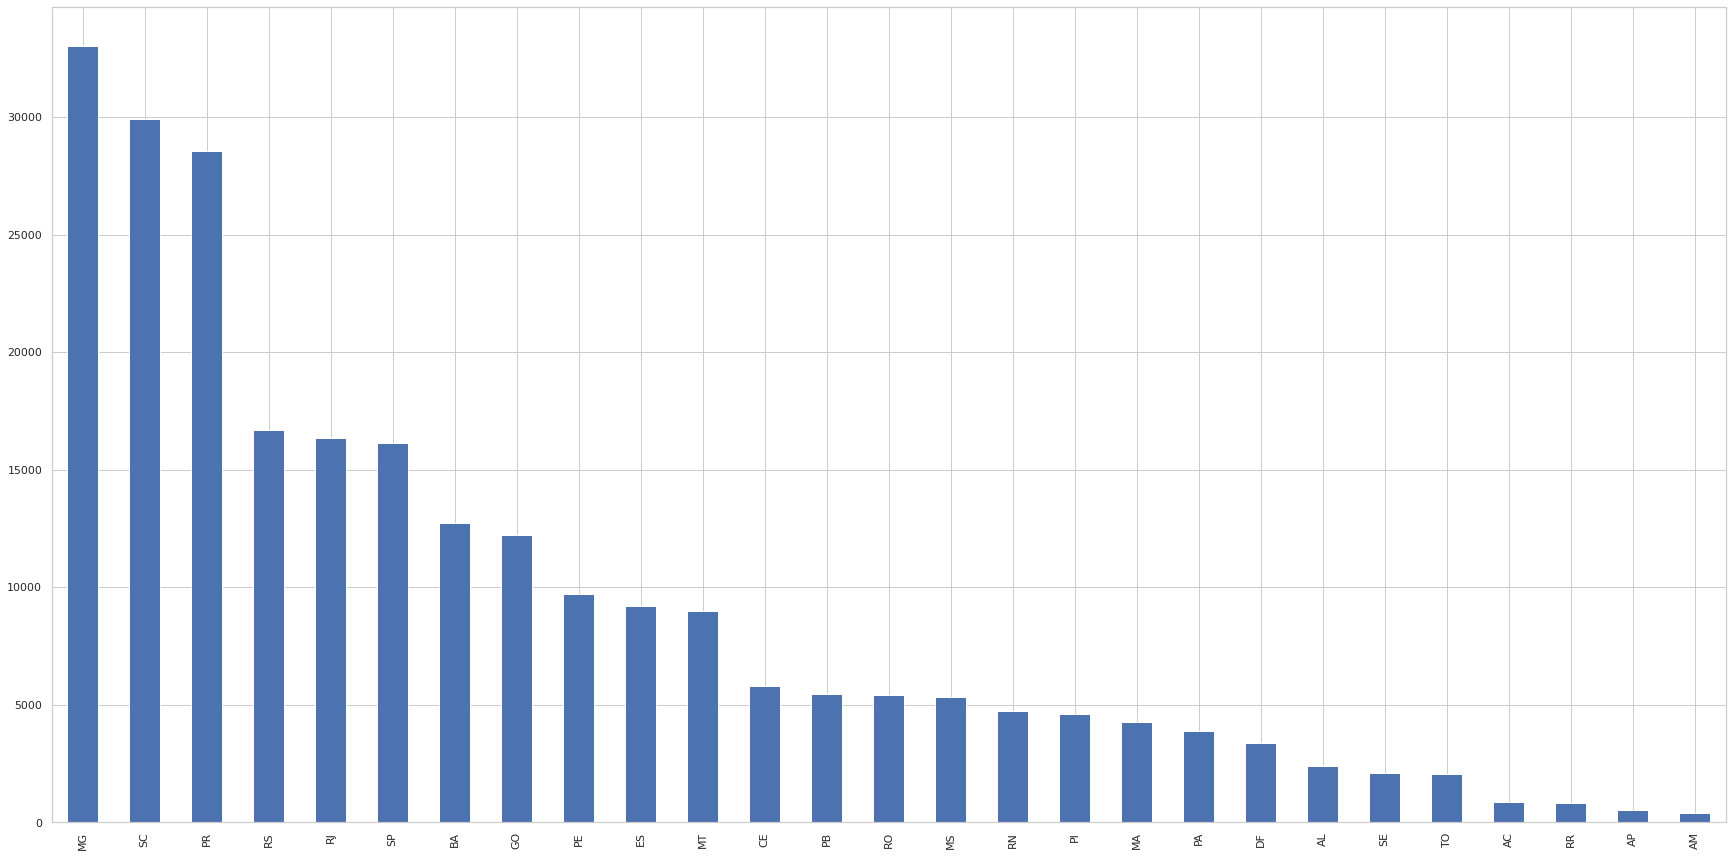

In [61]:
plt.figure(figsize=(30,15))
df_dtran['uf'].value_counts().plot(kind='bar');

In [62]:
df_dtran['uf'].value_counts().nlargest(10)

MG    33029
SC    29920
PR    28554
RS    16669
RJ    16347
SP    16148
BA    12711
GO    12221
PE     9698
ES     9203
Name: uf, dtype: int64

#### Number of accidents per hour

(0.0, 23.0)

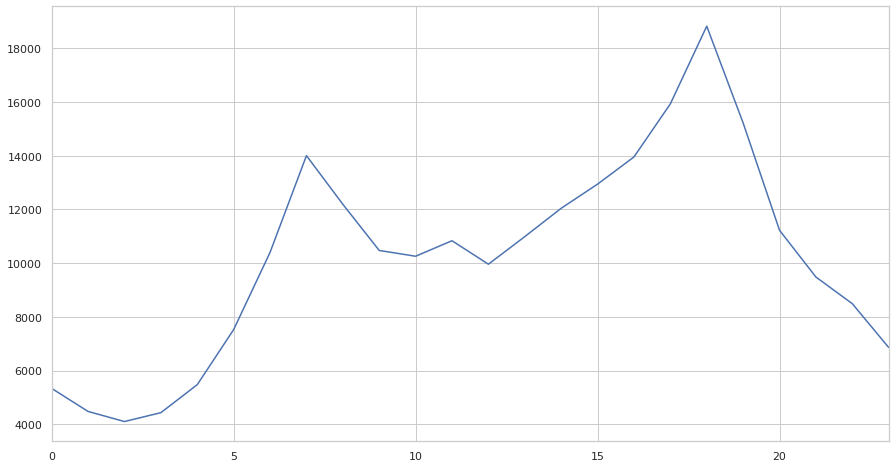

In [63]:
accidents_per_hour = df_dtran.hora.value_counts()

plt.figure(figsize=(15,8))
plt.plot(accidents_per_hour.sort_index())
plt.xlim(0, 23)

#### Number of accidents on each highway

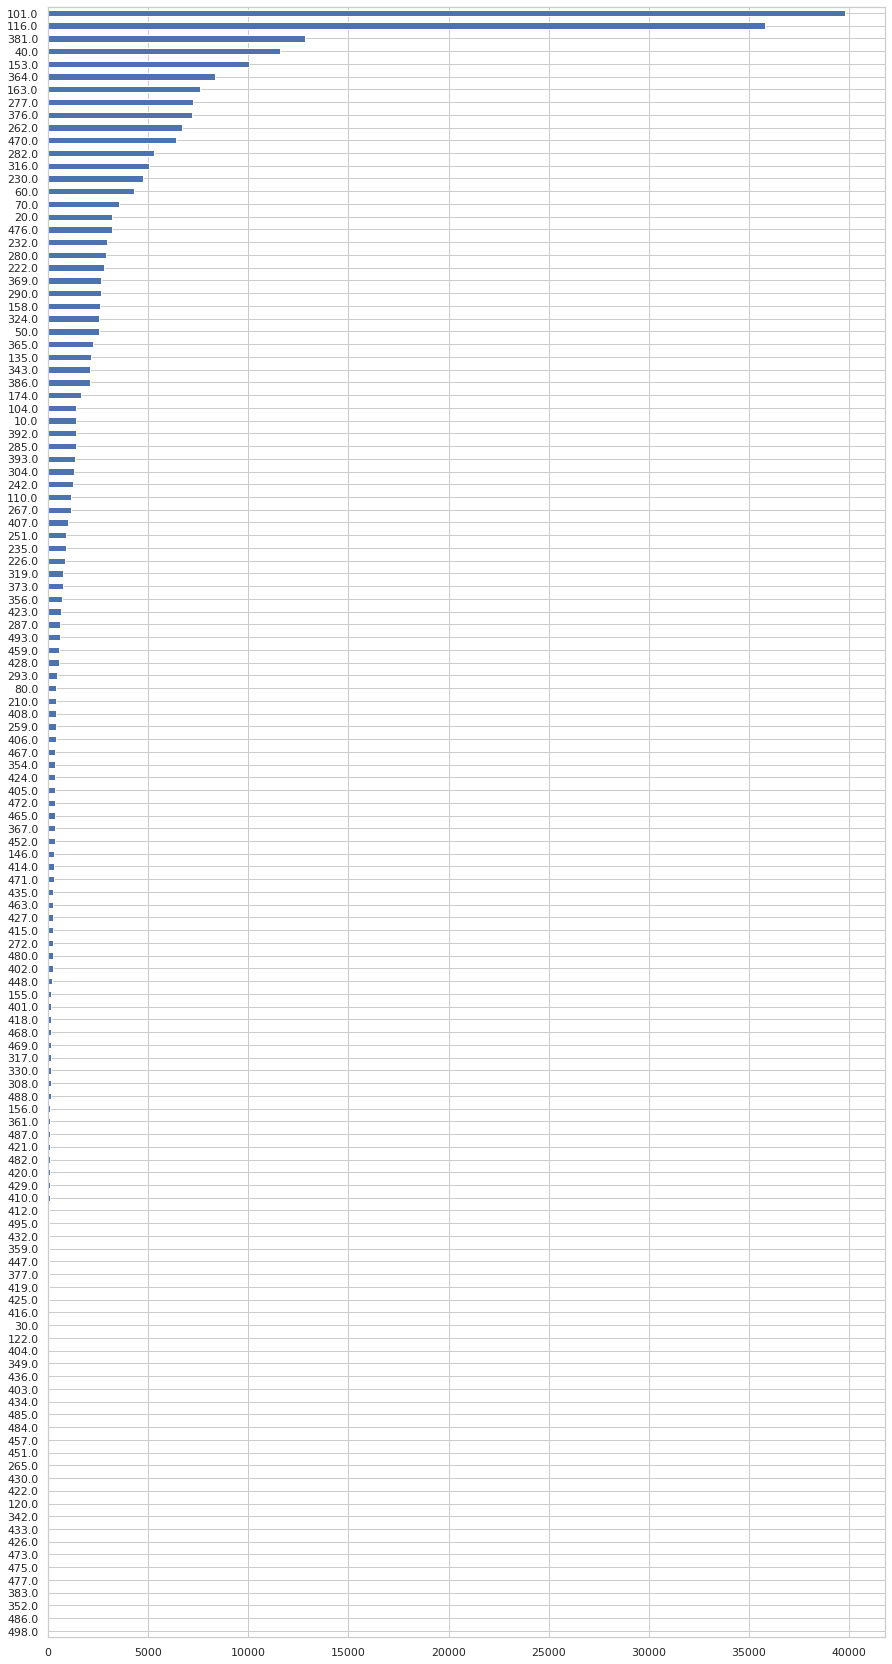

In [64]:
plt.figure(figsize=(15,30))
df_dtran['br'].value_counts(ascending=True).plot(kind='barh');

In [65]:
df_dtran['br'].value_counts(normalize=True).nlargest(20)

101.0    0.162168
116.0    0.145927
381.0    0.052186
40.0     0.047086
153.0    0.040801
364.0    0.033880
163.0    0.030914
277.0    0.029525
376.0    0.029301
262.0    0.027158
470.0    0.026124
282.0    0.021492
316.0    0.020506
230.0    0.019215
60.0     0.017541
70.0     0.014506
20.0     0.013076
476.0    0.012954
232.0    0.011923
280.0    0.011793
Name: br, dtype: float64

#### Number of accidents each month

Text(0, 0.5, 'Number of accidents')

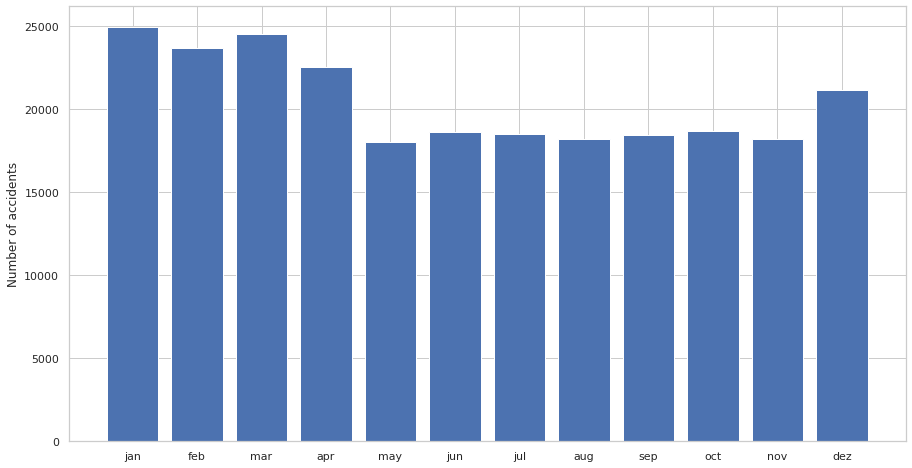

In [66]:
accidents_per_month = df_dtran.mes.value_counts()

plt.figure(figsize=(15,8))
plt.bar(np.arange(12), accidents_per_month.sort_index())
ticks = plt.xticks(np.arange(12), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dez'])
plt.ylabel('Number of accidents')

#### Number of accidents each year

Text(0, 0.5, 'Number of accidents')

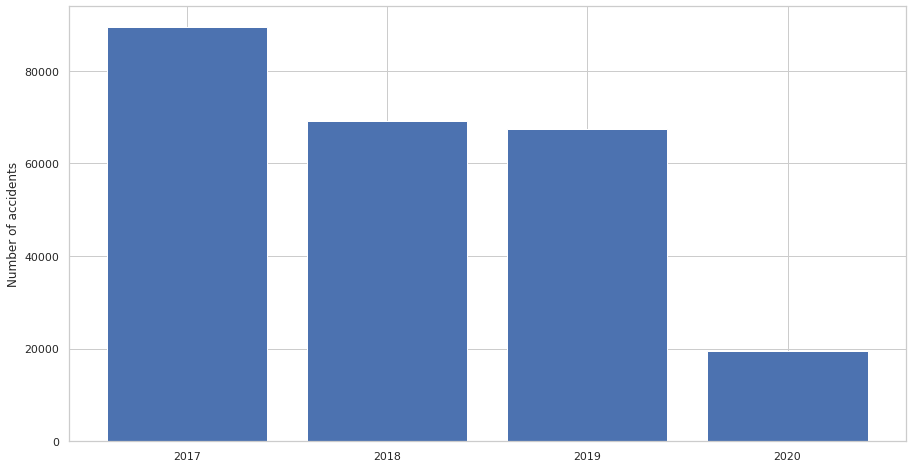

In [68]:
accidents_per_year = df_dtran.ano.value_counts()

plt.figure(figsize=(15,8))
plt.bar(np.arange(4), accidents_per_year.sort_index())
ticks = plt.xticks(np.arange(4), [2017, 2018, 2019, 2020])
plt.ylabel('Number of accidents')

In [69]:
grouped = df_dtran.groupby(['classificacao_acidente', 'ano']).size().unstack()
grouped['classificacao_acidente'] = grouped.index
grouped.head()

ano                      2017   2018   2019   2020 classificacao_acidente
classificacao_acidente                                                   
Com Vítimas Fatais       5181   4504   4590   1314     Com Vítimas Fatais
Com Vítimas Feridas     53611  49486  51128  14831    Com Vítimas Feridas
Sem Vítimas             30625  15191  11633   3392            Sem Vítimas

Text(0.5, 48.5, '')

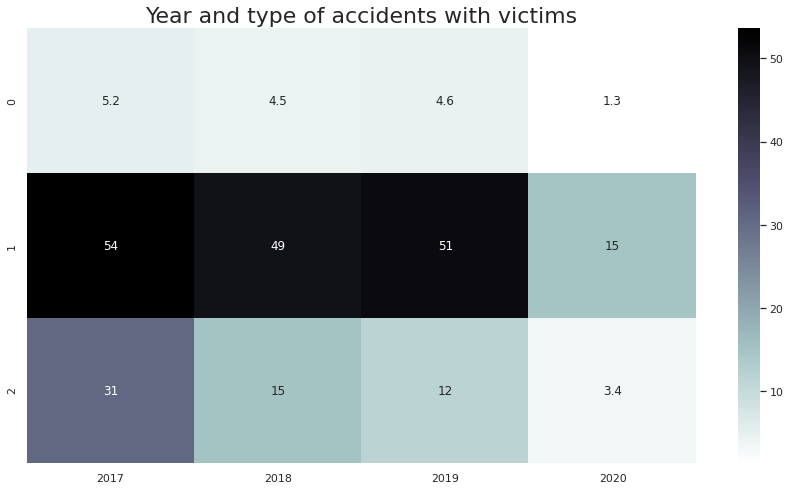

In [70]:
grouped = df_dtran.groupby(['target', 'ano']).size().unstack()

plt.figure(figsize=(15,8))
sns.heatmap(grouped/1000, cmap='bone_r', annot=True)
plt.title('Year and type of accidents with victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

#### Number of injured and cars involved in accidents

Text(0.5, 0, 'Number of vehicles')

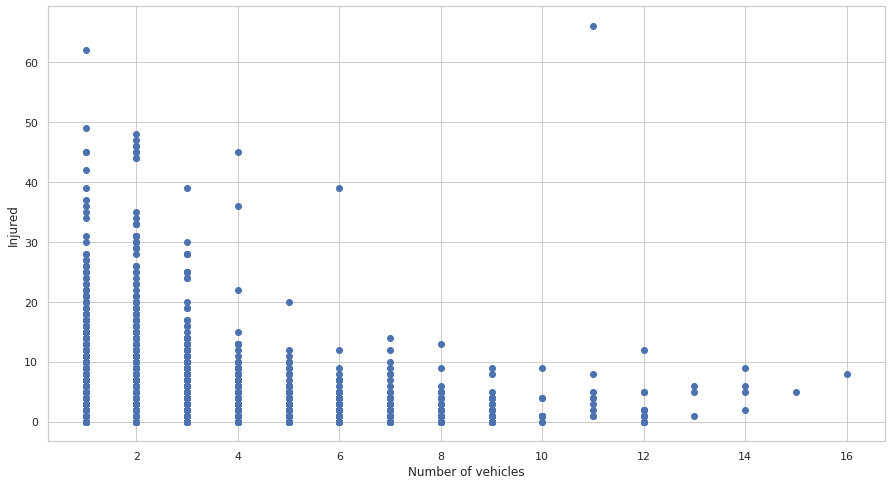

In [71]:
plt.figure(figsize=(15,8))
plt.scatter(df_dtran.veiculos, df_dtran.feridos)
plt.ylabel('Injured')
plt.xlabel('Number of vehicles')

#### Number of people involved and cars involved in accidents

Text(0.5, 0, 'Number of vehicles')

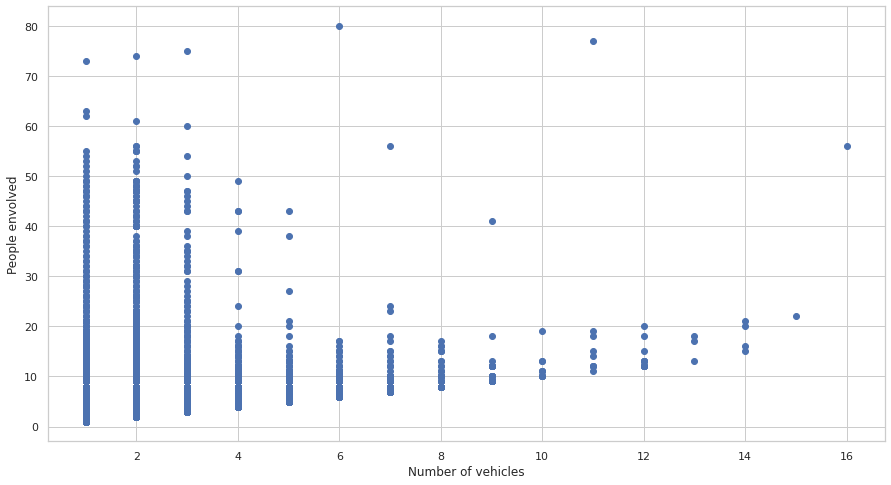

In [72]:
plt.figure(figsize=(15,8))
plt.scatter(df_dtran.veiculos, df_dtran.pessoas)
plt.ylabel('People envolved')
plt.xlabel('Number of vehicles')

## Calculating cost per type of accidents according to IPEA 
#### http://repositorio.ipea.gov.br/bitstream/11058/7456/1/RP_Estimativa_2015.pdf

###  All values were adjusted by inflation, since 2015, according to the correspondent year.
### The inflation indicator considered was IPCA (IBGE) available in: 
#### https://www3.bcb.gov.br/CALCIDADAO/publico/corrigirPorIndice.do?method=corrigirPorIndice

In [73]:
def custo_acidente(df_dtran):
    if (df_dtran['ano'] == 2017) and (df_dtran['target'] == 0):
        return 805097.19*df_dtran['mortos']
    
    elif (df_dtran['ano'] == 2017) and (df_dtran['target'] == 1):
        return 117161.34*df_dtran['feridos'] 
    
    elif (df_dtran['ano'] == 2017) and (df_dtran['target'] == 2):
        return 28456.95*df_dtran['ilesos'] 
    
    elif (df_dtran['ano'] == 2018) and (df_dtran['target'] == 0):
        return 832397.82*df_dtran['mortos']
    
    elif (df_dtran['ano'] == 2018) and (df_dtran['target'] == 1):
        return 121549.60*df_dtran['feridos'] 
    
    elif (df_dtran['ano'] == 2018) and (df_dtran['target'] == 2):
        return 29522.80*df_dtran['ilesos'] 
    
    elif (df_dtran['ano'] == 2019) and (df_dtran['target'] == 0):
        return 871218.21*df_dtran['mortos']
    
    elif (df_dtran['ano'] == 2019) and (df_dtran['target'] == 1):
        return 126783.57*df_dtran['feridos'] 
    
    elif (df_dtran['ano'] == 2019) and (df_dtran['target'] == 2):
        return 30794.07*df_dtran['ilesos'] 
    
    elif (df_dtran['ano'] == 2020) and (df_dtran['target'] == 0):
        return 944117.61*df_dtran['mortos']
    
    elif (df_dtran['ano'] == 2020) and (df_dtran['target'] == 1):
        return 126907.75*df_dtran['feridos'] 
    
    elif (df_dtran['ano'] == 2020) and (df_dtran['target'] == 2):
        return 30824.23*df_dtran['ilesos'] 

In [74]:
df_dtran = df_dtran.assign(custo_acidente=df_dtran.apply(custo_acidente, axis=1))

In [75]:
(df_dtran.groupby(['ano', 'classificacao_acidente'])[['custo_acidente']].sum()/1000000)

custo_acidente
ano  classificacao_acidente                
2017 Com Vítimas Fatais         5027.026854
     Com Vítimas Feridas        9281.287032
     Sem Vítimas                1508.531376
2018 Com Vítimas Fatais         4386.736511
     Com Vítimas Feridas        8781.958600
     Sem Vítimas                 777.778166
2019 Com Vítimas Fatais         4644.464278
     Com Vítimas Feridas        9481.128932
     Sem Vítimas                 607.936530
2020 Com Vítimas Fatais         1450.164649
     Com Vítimas Feridas        2771.665260
     Sem Vítimas                 170.088101

<Figure size 1080x1080 with 0 Axes>

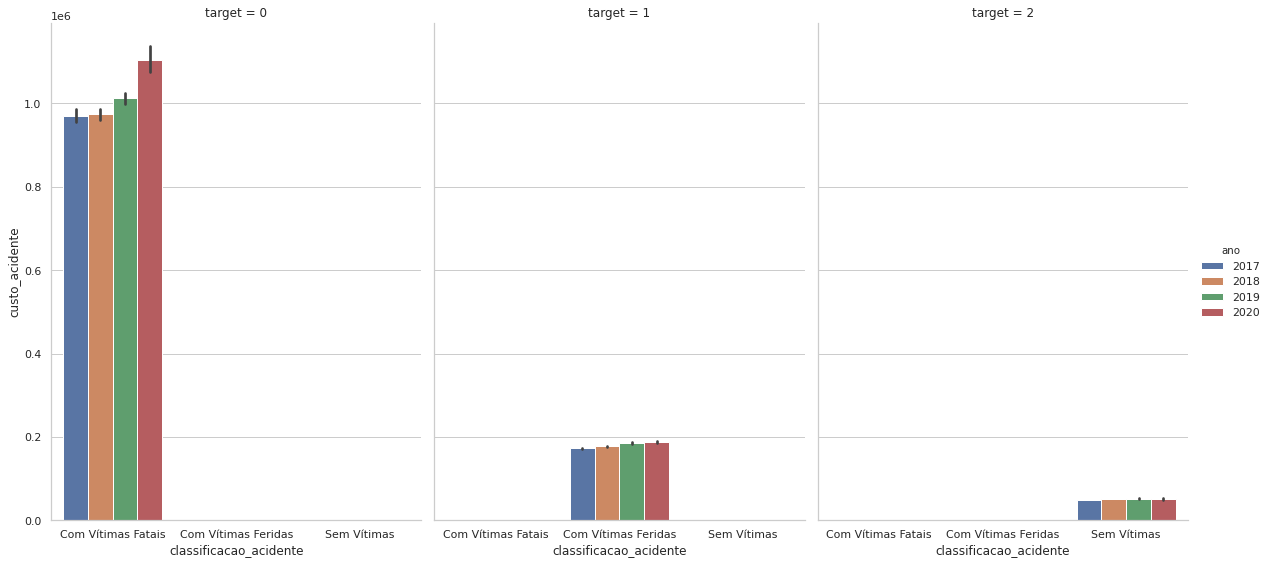

In [76]:
plt.figure(figsize=(15,15))
g = sns.catplot(x="classificacao_acidente", y="custo_acidente",
                hue="ano", col="target",
                data=df_dtran, kind="bar",
                height=8, aspect=.7);

### Conclusions about the dataset

Warnings:
- br (highway): High cardinality 127 registered highways. Group as highways that concentrate between 60% and 80% of the total number of accidents.
- dead: Death toll, remove for modelling to prevent data leakage.
- light_ injured / serious_ injured / injured: Number of injured, remove for modelling to prevent data leakage.
- unscathed: number of unscathed, remove for modelling to prevent data leakage.
- ignored: number of cases not categorized, remove for modelling to prevent data leakage.

Variables:
- End of weeks is the days with the highest number of accidents.
- MG, SC, PR, RS, RJ concentrate on the largest number of accidents.
- br101, br116, br381, br40, br153, are the ones with the highest number of accidents.
- Lack of attention is the biggest cause of accidents.
- Rear collision is the biggest cause of accidents.
- Most accidents occur in broad daylight and at night.
- Way direction is 50/50 variable and may not be so useful.
- Weather is clear in most cases.
- Track type has few cases on multiple tracks.
- Most of the cases happens in straight track stretch.
- Urban land use = yes / rural = no, chance in a single variable.
- Average occurrences have 2 people involved.
- Average death is less than 1.
- Average of the cars involved is 1.6.
- January and December seem to have the most cases. Include July may be useful, considering that is a vacation month too.

# Feature enginieering

In [77]:
def is_holiday(data_hora):
    date = pd.to_datetime(data_hora)
    if date in ('2017-01-01','2017-02-27','2017-02-28','2017-04-14','2017-04-21','2017-05-01','2017-06-15',
                '2017-09-07','2017-10-12','2017-11-02','2017-11-15','2017-12-25','2018-01-01','2018-02-12',
                '2018-02-13','2018-03-30','2018-04-21','2018-05-01','2018-05-31','2018-09-07','2018-10-12',
                '2018-11-02','2018-11-15','2018-12-25','2019-01-01','2019-03-04','2019-03-05','2019-04-19',
                '2019-04-21','2019-05-01','2019-06-20','2019-09-07','2019-10-12','2019-11-02','2019-11-15',
                '2019-12-25','2020-01-01','2020-02-24','2020-02-25','2020-04-10','2020-04-21','2020-05-01',
                '2020-06-11','2020-09-07','2020-10-12','2020-11-02','2020-11-15','2020-12-25' ):        
        return 1
    else:
        return 0

In [78]:
df_dtran['holiday'] = df_dtran['data_hora'].apply(is_holiday)

In [79]:
def is_vacation(data_hora):
    date = pd.to_datetime(data_hora)
    if date.month in (1, 7, 12):
        return 1
    else:
        return 0

In [80]:
df_dtran['vacation'] = df_dtran['data_hora'].apply(is_vacation)

In [81]:
df_dtran.loc[df_dtran['br'] == 101.0, 'br_101'] = 1
df_dtran.loc[df_dtran['br'] != 101.0, 'br_101'] = 0

df_dtran.loc[df_dtran['br'] == 116.0, 'br_116'] = 1
df_dtran.loc[df_dtran['br'] != 116.0, 'br_116'] = 0

df_dtran.loc[df_dtran['br'] == 381.0, 'br_381'] = 1
df_dtran.loc[df_dtran['br'] != 381.0, 'br_381'] = 0

df_dtran.loc[df_dtran['br'] == 40.0, 'br_040'] = 1
df_dtran.loc[df_dtran['br'] != 40.0, 'br_040'] = 0

df_dtran.loc[df_dtran['br'] == 153.0, 'br_153'] = 1
df_dtran.loc[df_dtran['br'] != 153.0, 'br_153'] = 0

df_dtran.loc[df_dtran['br'] == 364.0, 'br_364'] = 1
df_dtran.loc[df_dtran['br'] != 364.0, 'br_364'] = 0

df_dtran.loc[df_dtran['br'] == 163.0, 'br_163'] = 1
df_dtran.loc[df_dtran['br'] != 163.0, 'br_163'] = 0

df_dtran.loc[df_dtran['br'] == 277.0, 'br_277'] = 1
df_dtran.loc[df_dtran['br'] != 277.0, 'br_277'] = 0

df_dtran.loc[df_dtran['br'] == 376.0, 'br_376'] = 1
df_dtran.loc[df_dtran['br'] != 376.0, 'br_376'] = 0

df_dtran.loc[df_dtran['br'] == 262.0, 'br_262'] = 1
df_dtran.loc[df_dtran['br'] != 262.0, 'br_262'] = 0

df_dtran.loc[df_dtran['uso_solo'] == 'Sim', 'urbano'] = 1
df_dtran.loc[df_dtran['uso_solo'] != 'Sim', 'urbano'] = 0

####  The objective of creating these additional variables is to explain to the model relevant aspects of the problem that can increase overall performance.

# Saving the database clean and processed to start the modeling process.

In [82]:
# First we make sure that the local directory in which we'd like to store the training and validation csv files exists.
data_dir = './dataframe'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [83]:
df_dtran.to_csv(os.path.join(data_dir, 'df_dtran_clean1.csv'), index=False)

In [84]:
df_dtran_clean = pd.read_csv(os.path.join(data_dir, 'df_dtran_clean1.csv'))
df_dtran_clean.head()

dia_semana  uf     br                causa_acidente              tipo_acidente classificacao_acidente     fase_dia  sentido_via condicao_metereologica tipo_pista tracado_via uso_solo  pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  feridos  veiculos   latitude  longitude  target            data_hora   ano  mes  hora        tipo_acidente_reduz  custo_acidente  holiday  vacation  br_101  br_116  br_381  br_040  br_153  br_364  br_163  br_277  br_376  br_262  urbano
0  quarta-feira  TO  153.0              Animais na Pista    Atropelamento de Animal    Com Vítimas Feridas  Plena Noite    Crescente                Nublado    Simples        Reta      Não        5       0              0               5       0          0        5         1 -11.774602 -49.107450       1  2020-01-01 01:00:00  2020    1     1    Atropelamento de animal       634538.75        0         1     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0
1  quarta-feira  RJ  116.0  Falta de Atenção do Pedestre  Atropelamento de Pedestre     Com Vítimas Fatais  Plena Noite  Decrescente              Céu Claro      Dupla        Reta      Sim        2       1              0               0       1          0        0         1 -22.752230 -43.437910       0  2020-01-01 01:00:00  2020    1     1  Atropelamento de pedestre       944117.61        0         1     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0
2  quarta-feira  SC  101.0            Ingestão de Álcool            Colisão lateral    Com Vítimas Feridas  Plena Noite    Crescente                Nublado    Simples        Reta      Sim        2       0              1               0       1          0        1         2 -27.591935 -48.618246       1  2020-01-01 01:52:00  2020    1     1            Outras colisões       126907.75        0         1     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0
3  quarta-feira  RO  364.0       Velocidade Incompatível  Saída de leito carroçável    Com Vítimas Feridas  Plena Noite  Decrescente                Nublado    Simples        Reta      Sim        1       0              0               1       0          0        1         1 -11.446246 -61.437612       1  2020-01-01 01:15:00  2020    1     1             Saída de pista       126907.75        0         1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0
4  quarta-feira  PR  153.0            Ingestão de Álcool                Capotamento    Com Vítimas Feridas  Plena Noite    Crescente         Garoa/Chuvisco    Simples       Curva      Não        6       0              2               4       0          0        6         1 -25.675038 -50.750898       1  2020-01-01 01:30:00  2020    1     1                Capotamento       761446.50        0         1     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0

In [85]:
df_dtran_clean.shape

(245486, 42)

In [86]:
df_dtran_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245486 entries, 0 to 245485
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dia_semana              245486 non-null  object 
 1   uf                      245486 non-null  object 
 2   br                      245486 non-null  float64
 3   causa_acidente          245486 non-null  object 
 4   tipo_acidente           245486 non-null  object 
 5   classificacao_acidente  245486 non-null  object 
 6   fase_dia                245486 non-null  object 
 7   sentido_via             245486 non-null  object 
 8   condicao_metereologica  245486 non-null  object 
 9   tipo_pista              245486 non-null  object 
 10  tracado_via             245486 non-null  object 
 11  uso_solo                245486 non-null  object 
 12  pessoas                 245486 non-null  int64  
 13  mortos                  245486 non-null  int64  
 14  feridos_leves       

In [87]:
df_dtran.columns

Index(['dia_semana', 'uf', 'br', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'target', 'data_hora', 'ano', 'mes', 'hora', 'tipo_acidente_reduz', 'custo_acidente', 'holiday', 'vacation', 'br_101', 'br_116', 'br_381', 'br_040', 'br_153', 'br_364', 'br_163', 'br_277', 'br_376', 'br_262', 'urbano'], dtype='object')